In [1]:
# This script reads in the data file Astr511HW1data.dat which contains                               
# information for >600,000 stars with b > 80 degrees (within 10 deg of                               
# Gal. North Pole) and 14 < r < 21                                                                   

# It computes:                                                                                       
#      the absolute magnitude using photometric parallax relation                                    

# N. Nicole Sanchez      -- AST511: Galactic Structure                                               
# Univ. of Wash, Seattle -- January 17, 2017                                                         
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib inline

In [2]:
# FUNCTIONS                                                                                          
def dM_r_A2(Fe_H):
    dM_r = 4.50 - (1.11*Fe_H) - (0.18*Fe_H**2)
    return dM_r

def M_0r_A7(g_i):
    M_0r = -5.06 + (14.23*g_i) - (12.97*g_i**2) + (6.127*g_i**3) - (1.267*g_i**4) + (0.0967*g_i**5)
    return M_0r

def M_r_A3(g_i,Fe_H):
    M_0r_gi = M_0r_A7(g_i)
    dM_r    = dM_r_A2(Fe_H)

    M_r     = M_0r_gi + dM_r
    return M_r

def getFe_H(u_g,g_r):
    global A,B,C,D,E,F,G,H,I,J,Fe_H_gt0_6
    Fe_H = A + (B*u_g) + (C*g_r) + (D*u_g*g_r) + (E*u_g**2) + (F*g_r**2) + \
           (G*(u_g**2)*g_r) + (H*u_g*g_r**2) + (I*u_g**3) + (J*g_r**3)
    return Fe_H

def distance(r,M_r):
    D = 10**((r - M_r)/5)*10 # pc                                                                    
    return D

In [3]:
def stellar_dens_loop(Z_dist,dOmega_ster):
    dN_slices     = np.zeros(100)
    dV_slices     = np.zeros(100)
    Z_slices_max  = np.zeros(100)
    Z_step = 0.0

    for i in range(0,len(Z_slices_max)):
        if (i == 0):
            Z_step  = Z_step + dZ
            dV_0    = dOmega_ster * (Z_step**2) * dZ 
            dN_mask = Z_dist < Z_step
            dN_0      = len(Z_dist[dN_mask])
            #print('Z for this slice: ',Z_step)
            #print('Number of stars in slice:',dN_0)   
        
            Z_slices_max[i] = Z_step
            dN_slices[i]     = dN_0
            dV_slices[i]     = dV_0
        else:        
            Z_step    = Z_step + dZ
            dV_new    = dOmega_ster * (Z_step**2) * dZ 
            dN_mask_n = Z_dist < Z_step
            dN_new      = len(Z_dist[dN_mask_n])
            dN = dN_new - dN_0
            dV = dV_new - dV_0
            #print('Z for this slice: ',Z_step)
            #print('Number of stars in slice:',dN_new,dN_0,dN)
        
            Z_slices_max[i] = Z_step
            dN_slices[i]    = dN 
            dV_slices[i]    = dV
            dN_0 = dN_new
            dV_0 = dV_new
        
    return dN_slices,dV_slices,Z_slices_max

In [4]:
# READ IN DATA                                                                                       
SDSS = np.loadtxt('Astr511HW1data.dat',unpack=True)

ra   = SDSS[0] # degrees                                                                             
dec  = SDSS[1] # degrees
run  = SDSS[2] # observing night ID
A_r  = SDSS[3] # r-band extinction                                                                   
u    = SDSS[4] # SDSS photometry; correcte for A                                                     
g    = SDSS[5]
r    = SDSS[6]
i    = SDSS[7]
z    = SDSS[8]
u_e  = SDSS[9]  # photometric errors                                                                   
g_e  = SDSS[10]
r_e  = SDSS[11]
i_e  = SDSS[12]
z_e  = SDSS[13]
pmL  = SDSS[14] # milliarcsec/year; proper motion vectors: longit                                    
pmB  = SDSS[15] # milliarcsec/year; pm: latit; no info = 999.99                                      
pm_e = SDSS[16] # mas/year; mean proper motion error           

In [5]:
# CONSTANTS and SET VARIABLES                                                                        
A,B,C,D,E = -13.13,14.09,28.04,-5.51,-5.90
F,G,H,I,J = -58.68,9.14,-20.60,0.0,58.29

dOmega_deg  = 314 # degrees
dOmega_ster = dOmega_deg * 0.000304617 # steradian
dOmega_one  = 0.000304617

In [6]:
# CALCULATE ARRAYS                                                                                   
g_i = g - i
g_r = g - r
u_g = u - g

In [7]:
# Create Fe_H and M_r arrays for later use
g_r_gt06_mask = g_r >= 0.6
Fe_H   = getFe_H(u_g,g_r)
Fe_H[g_r_gt06_mask] = -0.6

M_r    = M_r_A3(g_i,Fe_H)
Z      = distance(r,M_r)
dZ     = max(Z)/100

576801


/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


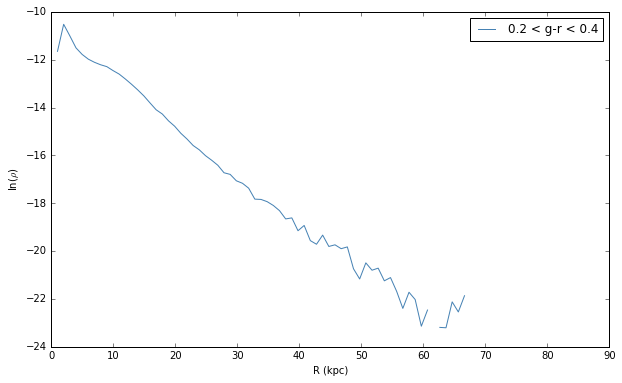

I believe the stellar density between Z = 5 and Z = 30.In this range, the data appears to have the least noise (comparedto Z > 30) and in the Z < 5 range, I worry about low numbers affecting the result.


In [8]:
# PART 1: Stellar Density vs Distance Plot 
# for 0.2 < g-r < 0.4                                                       
g_r_lt04_mask = g_r < 0.4
g_r_lt04      = g_r[g_r_lt04_mask]
print(len(g_r_lt04_mask))
Z_gr_lt04     = Z[g_r_lt04_mask]
g_r_gt02_mask = g_r_lt04 > 0.2
g_r_gt02_lt04 = g_r_lt04[g_r_gt02_mask]
Z_gr_gt02_lt04 = Z_gr_lt04[g_r_gt02_mask]
#print(len(Z_gr_gt02_lt04),len(Z))

dN_gr_0204, dV_gr_0204,Z_slices_max = stellar_dens_loop(Z_gr_gt02_lt04,dOmega_ster)
p_sdens_0204 = dN_gr_0204/dV_gr_0204

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(Z_slices_max/1000,np.log(p_sdens_0204),color='SteelBlue',label='0.2 < g-r < 0.4')
plt.xlabel('R (kpc)')
plt.ylabel(r'ln($\rho$)')
plt.legend()
plt.show()

print('I believe the stellar density between Z = 5 and Z = 30.\
In this range, the data appears to have the least noise (compared\
to Z > 30) and in the Z < 5 range, I worry about low numbers\
 affecting the result.')

92299 576801
49386 576801
36206 576801


/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log
/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log
/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log
/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log


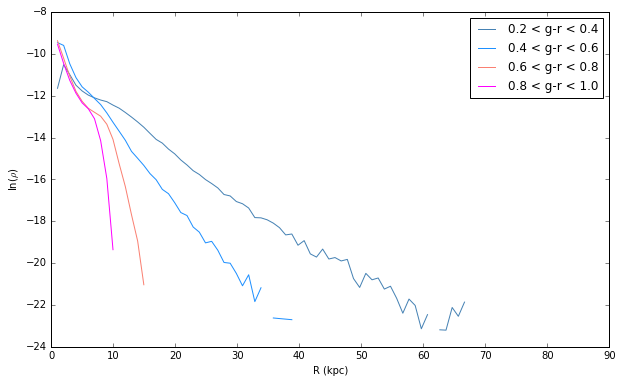

The stellar density drops off very rapidly aswe look at higher ranges of the g-r color. Additionally, we expect greater noise in the sample as we examine larger g-r bins and find smaller and smaller samples of data points.


In [9]:
# PART 2: Stellar Density vs Distance Plot 
# for 0.4 < g-r < 0.6, 0.6 < g − r < 0.8, and 0.8 < g − r < 1.0

# 0.4 < g-r < 0.6
g_r_lt06_mask = g_r < 0.6
g_r_lt06      = g_r[g_r_lt06_mask]
Z_gr_lt06     = Z[g_r_lt06_mask]
g_r_gt04_mask = g_r_lt06 > 0.4
g_r_gt04_lt06 = g_r_lt06[g_r_gt04_mask]
Z_gr_gt04_lt06 = Z_gr_lt06[g_r_gt04_mask]
print(len(Z_gr_gt04_lt06),len(Z))

dN_gr_0406, dV_gr_0406,Z_slices_max = stellar_dens_loop(Z_gr_gt04_lt06,dOmega_ster)
p_sdens_0406 = dN_gr_0406/dV_gr_0406

# 0.6 < g − r < 0.8
g_r_lt08_mask = g_r < 0.8
g_r_lt08      = g_r[g_r_lt08_mask]
Z_gr_lt08     = Z[g_r_lt08_mask]
g_r_gt06_mask = g_r_lt08 > 0.6
g_r_gt06_lt08 = g_r_lt08[g_r_gt06_mask]
Z_gr_gt06_lt08 = Z_gr_lt08[g_r_gt06_mask]
print(len(Z_gr_gt06_lt08),len(Z))

dN_gr_0608, dV_gr_0608,Z_slices_max = stellar_dens_loop(Z_gr_gt06_lt08,dOmega_ster)
p_sdens_0608 = dN_gr_0608/dV_gr_0608

# 0.8 < g − r < 1.0
g_r_lt10_mask = g_r < 1.0
g_r_lt10      = g_r[g_r_lt10_mask]
Z_gr_lt10     = Z[g_r_lt10_mask]
g_r_gt08_mask = g_r_lt10 > 0.8
g_r_gt08_lt10 = g_r_lt10[g_r_gt08_mask]
Z_gr_gt08_lt10 = Z_gr_lt10[g_r_gt08_mask]
print(len(Z_gr_gt08_lt10),len(Z))

dN_gr_0810, dV_gr_0810,Z_slices_max = stellar_dens_loop(Z_gr_gt08_lt10,dOmega_ster)
p_sdens_0810 = dN_gr_0810/dV_gr_0810

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(Z_slices_max/1000,np.log(p_sdens_0204),color='SteelBlue',label='0.2 < g-r < 0.4')
plt.plot(Z_slices_max/1000,np.log(p_sdens_0406),color='DodgerBlue',label='0.4 < g-r < 0.6')
plt.plot(Z_slices_max/1000,np.log(p_sdens_0608),color='Salmon',label='0.6 < g-r < 0.8')
plt.plot(Z_slices_max/1000,np.log(p_sdens_0810),color='Magenta',label='0.8 < g-r < 1.0')
plt.xlabel('R (kpc)')
plt.ylabel(r'ln($\rho$)')
plt.legend()
plt.show()

print('The stellar density drops off very rapidly as\
we look at higher ranges of the g-r color. Additionally, \
we expect greater noise in the sample as we examine \
larger g-r bins and find smaller and smaller samples\
 of data points.')


/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log
/Users/the_neekster/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


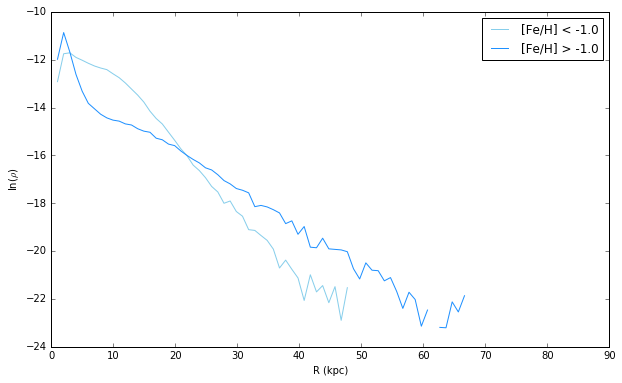

There is a higher density of low metallicity stars closer to the center of galaxy, and higher metallicity stars are more present after the turnover around Z > 20 kpc. This makes sense when we consider the disk/halo metallicity difference (assuming that disk as having a radius of ~30 kpc.


In [10]:
# PART 3: Stellar Density vs Distance Plot 
# for 0.2 < g-r < 0.4 split by [Fe/H]
# High metallicity: [Fe/H] > -1.0
# Low metallicity: [Fe/H] < -1.0
FeH_gr_lt04 = Fe_H[g_r_lt04_mask]
FeH_gr_0204 = FeH_gr_lt04[g_r_gt02_mask]

low_metal_mask    = FeH_gr_0204 < -1.0
FeH_lowmet_gr0204 = FeH_gr_0204[low_metal_mask]
Z_lowmet_gr0204   = Z_gr_gt02_lt04[low_metal_mask]
high_metal_mask   = FeH_gr_0204 > -1.0
FeH_himet_gr0204  = FeH_gr_0204[high_metal_mask]
Z_himet_gr0204    = Z_gr_gt02_lt04[high_metal_mask]

dN_lowmet_gr_0204, dV_lowmet_gr_0204,Z_slices_max = stellar_dens_loop(Z_lowmet_gr0204,dOmega_ster)
p_lowmet_sdens_0204 = dN_lowmet_gr_0204/dV_lowmet_gr_0204

dN_himet_gr_0204, dV_himet_gr_0204,Z_slices_max = stellar_dens_loop(Z_himet_gr0204,dOmega_ster)
p_himet_sdens_0204 = dN_himet_gr_0204/dV_himet_gr_0204

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(Z_slices_max/1000,np.log(p_lowmet_sdens_0204),color='SkyBlue',label='[Fe/H] < -1.0')
plt.plot(Z_slices_max/1000,np.log(p_himet_sdens_0204),color='DodgerBlue',label='[Fe/H] > -1.0')
plt.xlabel('R (kpc)')
plt.ylabel(r'ln($\rho$)')
plt.legend()
plt.show()

print('There is a higher density of low metallicity \
stars closer to the center of galaxy, and higher \
metallicity stars are more present after the turnover \
around Z > 20 kpc. This makes sense when we consider \
the disk/halo metallicity difference (assuming that \
disk as having a radius of ~30 kpc.')

In [13]:
# PART 4: Plot R-band magnitude histograms
r_gr02_lt04 = r[g_r_lt04_mask]
r_gr_0204   = r_gr02_lt04[g_r_gt02_mask]

r_himet_gr0204  = r_gr_0204[high_metal_mask]
r_lowmet_gr0204 = r_gr_0204[low_metal_mask]

#print(max(r_himet_gr0204))
#print(min(r_himet_gr0204))
#print(max(r_himet_gr0204)-min(r_himet_gr0204))

plt.hist(r_himet_gr0204,bins=16,fill='None',color='DodgerBlue',label='[Fe/H] > -1.0')
plt.hist(r_lowmet_gr0204,bins=16,fill='None',color='SkyBlue',label='[Fe/H] < -1.0')
plt.xlabel('r-band magnitude')
plt.legend(loc=2)
plt.show()

print('I find that in addition to a larger distribution of low metallicity \
stars, these stars also end up being redder than those with higher metallicity. \
It is also interesting to note that the full distribution appears somewhat Gaussian.')

I find that in addition to a larger distribution of low metallicity stars, these stars also end up being redder than those with higher metallicity. It is also interesting to note that the full distribution appears somewhat Gaussian.


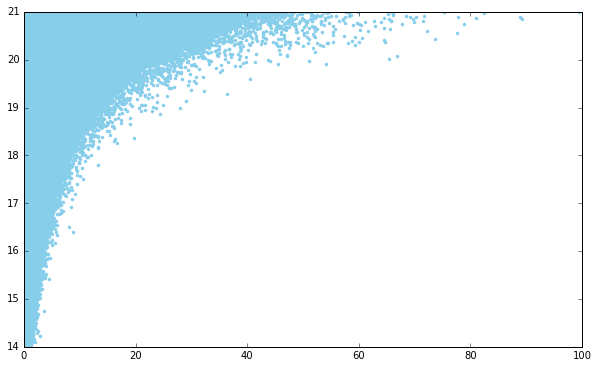

The faint r-band limit will need to be at minimum r ~ 21. Any r-band limit at a higher magnitude will lose stars at Z > 80 kpc.


In [14]:
# PART 5: Faint r band limit
plt.plot(Z/1000,r,marker='.',linestyle='None',color='Skyblue')
plt.show()

print('The faint r-band limit will need to be at minimum r ~ 21. \
Any r-band limit at a higher magnitude will lose stars at Z > 80 kpc.')

576801


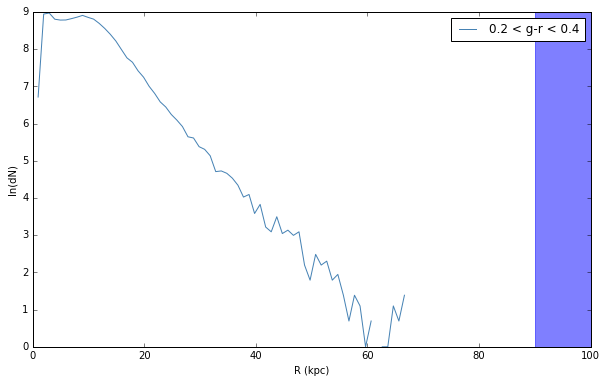

There would be no stars found between 90 - 100 kpc.


In [52]:
# Stellar Density vs Distance Plot
# for 0.2 < g-r < 0.4                                                       
g_r_lt04_mask = g_r < 0.4
g_r_lt04      = g_r[g_r_lt04_mask]
print(len(g_r_lt04_mask))
Z_gr_lt04     = Z[g_r_lt04_mask]
g_r_gt02_mask = g_r_lt04 > 0.2
g_r_gt02_lt04 = g_r_lt04[g_r_gt02_mask]
Z_gr_gt02_lt04 = Z_gr_lt04[g_r_gt02_mask]
#print(len(Z_gr_gt02_lt04),len(Z))

dN_gr_0204, dV_gr_0204,Z_slices_max = stellar_dens_loop(Z_gr_gt02_lt04,dOmega_one)
p_sdens_0204 = dN_gr_0204/dV_gr_0204

plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(Z_slices_max/1000,np.log(dN_gr_0204),color='SteelBlue',label='0.2 < g-r < 0.4')
plt.xlabel('R (kpc)')
plt.ylabel(r'ln(dN)')
plt.gca().add_patch(Rectangle((90,0),10,10,color='Blue',alpha=0.5))
plt.xlim(0,100)
plt.legend()
plt.show()

print('There would be no stars found between 90 - 100 kpc.')